# Import libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

# Load data

In [2]:
df_demo = pd.read_csv('Data/df_demography.csv', sep=',', dtype={'cpr': str})
df_pers = pd.read_csv('Data/df_personal_characteristic.csv', sep=',', dtype={'cpr': str})

In [3]:
df_pers.to_pickle('Data/df_personal_characteristic.pkl')

In [4]:
df_pers = pd.read_pickle('Data/df_personal_characteristic.pkl')

# Data preprocessing / Feature engineering

#### Merge datakilder

In [5]:
df_demo.head(5)

,cpr,municipality,salary
0,1203913055,Esbjerg,377218
1,1308952064,Sønderborg,286903
2,2410936634,Thisted,337835
3,1605952976,København,273928
4,2802942759,Silkeborg,318220


In [6]:
df_pers.head(5)

,cpr,height,weight,hair_len
0,1203913055,1.80,82.1,7.5
1,1308952064,1.58,61.6,47.2
2,2410936634,1.66,73.7,28.4
3,1605952976,1.71,74.2,46.8
4,2802942759,1.91,83.8,6.3


In [7]:
df = pd.merge(df_demo, df_pers, on='cpr')

In [8]:
df.head(5)

,cpr,municipality,salary,height,weight,hair_len
0,1203913055,Esbjerg,377218,1.80,82.1,7.5
1,1308952064,Sønderborg,286903,1.58,61.6,47.2
2,2410936634,Thisted,337835,1.66,73.7,28.4
3,1605952976,København,273928,1.71,74.2,46.8
4,2802942759,Silkeborg,318220,1.91,83.8,6.3


In [9]:
len(df)

7767

#### Generer nye variable

In [10]:
df['gender'] = df['cpr'].str[9].apply(int)
df['gender'] = np.where(df['gender'] % 2 == 0, 'woman', 'man')

In [11]:
df.head(5)

,cpr,municipality,salary,height,weight,hair_len,gender
0,1203913055,Esbjerg,377218,1.80,82.1,7.5,man
1,1308952064,Sønderborg,286903,1.58,61.6,47.2,woman
2,2410936634,Thisted,337835,1.66,73.7,28.4,woman
3,1605952976,København,273928,1.71,74.2,46.8,woman
4,2802942759,Silkeborg,318220,1.91,83.8,6.3,man


In [12]:
df['year'] = df['cpr'].str[4:6]
df['year'] = '19' + df['year']

In [13]:
df['month'] = df['cpr'].str[2:4]

In [14]:
df['day'] = df['cpr'].str[0:2]

In [15]:
df['birthday'] = pd.to_datetime(df['day'] + df['month'] + df['year'], format='%d%m%Y')

In [16]:
df.head(5)

,cpr,municipality,salary,height,weight,hair_len,gender,year,month,day,birthday
0,1203913055,Esbjerg,377218,1.80,82.1,7.5,man,1991,03,12,1991-03-12
1,1308952064,Sønderborg,286903,1.58,61.6,47.2,woman,1995,08,13,1995-08-13
2,2410936634,Thisted,337835,1.66,73.7,28.4,woman,1993,10,24,1993-10-24
3,1605952976,København,273928,1.71,74.2,46.8,woman,1995,05,16,1995-05-16
4,2802942759,Silkeborg,318220,1.91,83.8,6.3,man,1994,02,28,1994-02-28


In [17]:
from datetime import datetime

df['age'] = datetime.now() - df['birthday']
df['age'] = df['age'].astype('timedelta64[Y]')

In [18]:
df.head(5)

,cpr,municipality,salary,height,weight,hair_len,gender,year,month,day,birthday,age
0,1203913055,Esbjerg,377218,1.80,82.1,7.5,man,1991,03,12,1991-03-12,28.0
1,1308952064,Sønderborg,286903,1.58,61.6,47.2,woman,1995,08,13,1995-08-13,23.0
2,2410936634,Thisted,337835,1.66,73.7,28.4,woman,1993,10,24,1993-10-24,25.0
3,1605952976,København,273928,1.71,74.2,46.8,woman,1995,05,16,1995-05-16,24.0
4,2802942759,Silkeborg,318220,1.91,83.8,6.3,man,1994,02,28,1994-02-28,25.0


In [19]:
df = df.iloc[:1500]

# Split into train and test set

In [20]:
X = df[['weight', 'height']].values
y = df['gender'].values

In [21]:
X

array([[82.1 ,  1.8 ],
       [61.6 ,  1.58],
       [73.7 ,  1.66],
       ...,
       [83.9 ,  1.8 ],
       [84.2 ,  1.87],
       [88.8 ,  1.7 ]])

In [22]:
y

array(['man', 'woman', 'woman', ..., 'man', 'man', 'man'], dtype=object)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(1500, 2)
(1200, 2)
(300, 2)


# Build and train model

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
model = KNeighborsClassifier(n_neighbors=2)

In [27]:
model.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [28]:
print(model.n_neighbors)
print(model.classes_)

2
['man' 'woman']


# Make predictions

In [29]:
prediction = model.predict([[58, 1.6]]) # [81, 1.81]
print(prediction)

['woman']


In [30]:
prediction_probability = model.predict_proba([[80, 1.7]])
print(prediction_probability)

[[0. 1.]]


In [31]:
y_pred = model.predict(X_test)

In [32]:
y_pred

array(['man', 'woman', 'man', 'man', 'man', 'man', 'man', 'man', 'man',
       'man', 'man', 'man', 'woman', 'woman', 'woman', 'woman', 'man',
       'woman', 'man', 'man', 'man', 'woman', 'woman', 'woman', 'man',
       'man', 'woman', 'man', 'man', 'woman', 'woman', 'woman', 'woman',
       'man', 'woman', 'man', 'woman', 'man', 'woman', 'man', 'man',
       'woman', 'man', 'man', 'man', 'man', 'man', 'woman', 'man', 'man',
       'man', 'woman', 'woman', 'woman', 'woman', 'man', 'woman', 'man',
       'man', 'man', 'man', 'woman', 'man', 'man', 'man', 'woman',
       'woman', 'man', 'man', 'woman', 'man', 'man', 'man', 'man',
       'woman', 'woman', 'man', 'woman', 'man', 'man', 'woman', 'man',
       'woman', 'man', 'man', 'woman', 'woman', 'woman', 'man', 'man',
       'man', 'man', 'woman', 'woman', 'man', 'man', 'man', 'man',
       'woman', 'woman', 'man', 'man', 'woman', 'woman', 'man', 'man',
       'man', 'woman', 'man', 'woman', 'woman', 'man', 'woman', 'woman',
       'ma

# Performance metrics

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

In [34]:
print(y_test[:10])
print(y_pred[:10])

['man' 'woman' 'man' 'man' 'man' 'man' 'man' 'man' 'man' 'man']
['man' 'woman' 'man' 'man' 'man' 'man' 'man' 'man' 'man' 'man']


In [35]:
confusion_matrix(y_test, y_pred)

array([[164,   6],
       [ 15, 115]])

In [36]:
import matplotlib
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.figure(figsize=(8, 8))
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list('some_name', ['#ffffff', '#35af5d'], N=256, gamma=1.0)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    #thresh = max(cm.max() / 2., 0)
    thresh = 1
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if cm[i, j] > thresh:
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     verticalalignment="center",
                     color="black",
                     fontsize=12)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


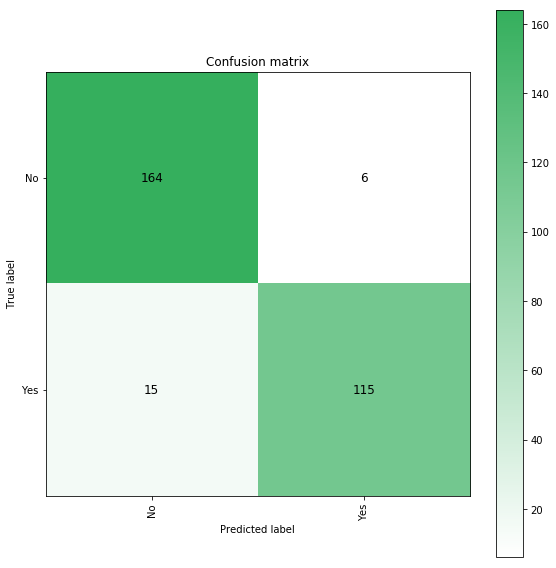

In [37]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['No', 'Yes'])

In [38]:
accuracy_score(y_test, y_pred)

# sum(y_test == y_pred) / len(y_test)

0.93

In [39]:
precision_score(y_test, y_pred, pos_label='woman')

# tp / (tp + fp)

0.9504132231404959

In [40]:
recall_score(y_test, y_pred, pos_label='woman')

# tp / (tp + fn)

0.8846153846153846

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         man       0.92      0.96      0.94       170
       woman       0.95      0.88      0.92       130

   micro avg       0.93      0.93      0.93       300
   macro avg       0.93      0.92      0.93       300
weighted avg       0.93      0.93      0.93       300



# Visualize

In [42]:
X_test[:10]

array([[94.6 ,  1.9 ],
       [72.1 ,  1.75],
       [88.8 ,  1.7 ],
       [89.6 ,  1.86],
       [84.2 ,  1.96],
       [92.6 ,  1.89],
       [89.2 ,  1.65],
       [87.4 ,  1.63],
       [89.1 ,  1.78],
       [88.5 ,  1.86]])

In [43]:
y_test[:10]

array(['man', 'woman', 'man', 'man', 'man', 'man', 'man', 'man', 'man',
       'man'], dtype=object)

In [44]:
df[['weight', 'height']].head(5)

,weight,height
0,82.1,1.80
1,61.6,1.58
2,73.7,1.66
3,74.2,1.71
4,83.8,1.91


In [45]:
weights = X_test[:,0]

heights = X_test[:,1]

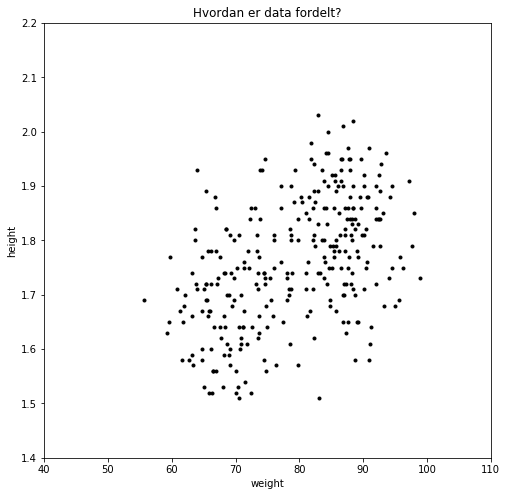

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.scatter(weights, heights, c='k', marker='.')
plt.axis([40, 110, 1.4, 2.2])
plt.xlabel('weight')
plt.ylabel('height')
plt.title('Hvordan er data fordelt?')
plt.show()

In [47]:
# y_test == 'woman'

In [48]:
color_true = np.where(y_test == 'woman', 'b', 'r')
color_pred = np.where(y_pred == 'woman', 'c', 'm')

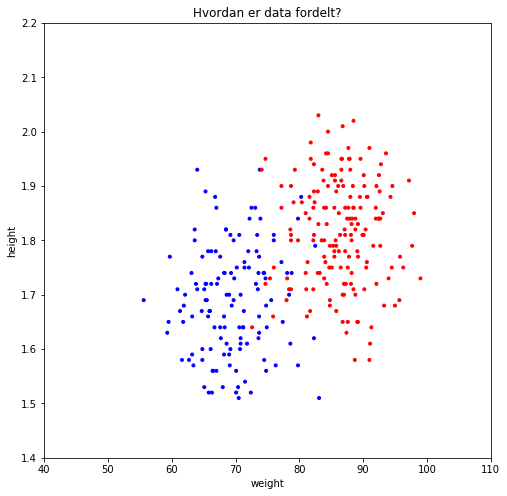

In [49]:
plt.figure(figsize=(8,8))
plt.scatter(weights, heights, c=color_true, marker='.')
plt.axis([40, 110, 1.4, 2.2])
plt.xlabel('weight')
plt.ylabel('height')
plt.title('Hvordan er data fordelt?')
plt.show()

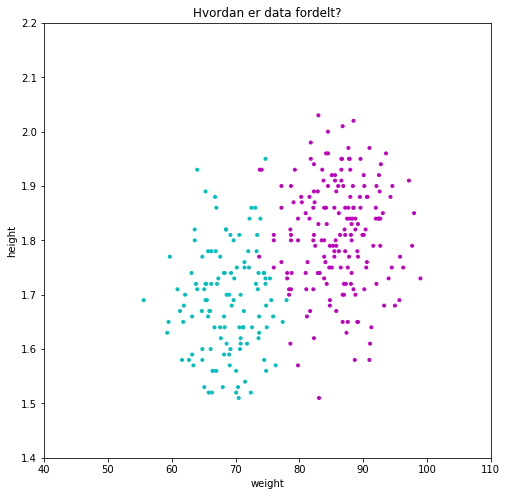

In [50]:
plt.figure(figsize=(8,8))
plt.scatter(weights, heights, c=color_pred, marker='.')
plt.axis([40, 110, 1.4, 2.2])
plt.xlabel('weight')
plt.ylabel('height')
plt.title('Hvordan er data fordelt?')
plt.show()

# Øvelser - Fine tune model

- Prøv at træne modellen med forskellige antal naboer ($n$-værdier) og se hvordan det påvirker performance metrics.
- Prøv at tilføje en ny kolonne til træningsdata. Dvs. tilføj også ```salary``` til $X$ og træn modellen igen. Se hvordan det påvirker performance metrics.
- Importer en anden klassifikationsmodel og lav prædiktioner med denne på samme måde som overstående. Brug logistisk regression fra scikit learn.
  
  ```from sklearn.linear_model import LogisticRegression```